In [1]:
#import warnings
#warnings.filterwarnings('ignore') # make the notebook nicer

In [2]:
#conda install -c ambermd pytraj
#conda install -c bioconda nglview
#jupyter-nbextension enable nglview --py --sys-prefix
#%matplotlib widget

In [1]:
#interactive 
import pytraj as pt
import nglview as nv
from subprocess import call
with open("polyA.pdb", "w") as f:
    call(["./fd_helix", "abdna","aaaaaaaaaa"], stdout=f)
traj = pt.load('polyA.pdb')
pt.rotate(traj, 'y 90')
view = nv.show_pytraj(traj)
view

NGLWidget()

In [4]:
nv.write_html('view.html', [view]) # doctest: +SKIP
from IPython.display import IFrame
IFrame(src="view.html", width=500, height=500)

In [6]:
#conda install -c omnia openmm
from simtk.openmm.app import *
from simtk.openmm import *
from simtk.unit import *
from sys import stdout

pdb = PDBFile('polyA.pdb')
forcefield = ForceField('amber14-all.xml', 'amber14/tip3pfb.xml')

In [7]:
pdb.getTopology()

<Topology; 2 chains, 20 residues, 404 atoms, 452 bonds>

In [8]:
modeller = Modeller (pdb.topology, pdb.positions)
modeller.addHydrogens (forcefield)
modeller.getTopology()

<Topology; 2 chains, 20 residues, 638 atoms, 686 bonds>

In [9]:
pdbfile.PDBFile.writeModel(modeller.topology,modeller.positions,open('polyA_with_H.pdb','w'))
traj = pt.load('polyA_with_H.pdb')
pt.rotate(traj, 'y 90')
view = nv.show_pytraj(traj)
view

NGLWidget()

In [10]:
# static image 
view.render_image()

In [11]:
view._display_image()

In [12]:
integrator = LangevinIntegrator(300*kelvin, 1/picosecond, 0.001*picoseconds)

In [13]:
system = forcefield.createSystem(modeller.topology)
simulation = Simulation(modeller.topology, system, integrator)
simulation.context.setPositions(modeller.positions)
#simulation.minimizeEnergy()

In [14]:
simulation.reporters.append(PDBReporter('polyA_with_H.pdb',100))
simulation.reporters.append(StateDataReporter(stdout, 500, step=True,potentialEnergy=True, temperature=True))
simulation.step(3000)

#"Step","Potential Energy (kJ/mole)","Temperature (K)"
500,6971.140760211628,248.73626279090206
1000,6777.621485614441,315.844635452023
1500,6508.992808458345,339.41092608345883
2000,6328.750296066524,329.23602790551195
2500,5914.859766069015,339.8631935770484
3000,5699.496393892093,323.6665132750922


In [15]:
traj = pt.load('polyA_with_H.pdb')
pt.rotate(traj, 'y 90')
view = nv.show_pytraj(traj)
view

NGLWidget(count=30)

In [16]:
from time import sleep

for frame in range(0, 30):
    view.frame = frame
    # make sure to let NGL spending enough time to update coordinates
    sleep(0.5)
    view.download_image(filename='0image{}.png'.format(frame))
    # make sure to let NGL spending enough time to render before going to next frame
    sleep(2.0)
#move images to renders/DNA_denature

In [17]:
import moviepy.editor as mpy
template = 'renders/DNA_denature/0image{}.png'
imagefiles = [template.format(str(i)) for i in range(0, 30)]

In [310]:
view.render_image()

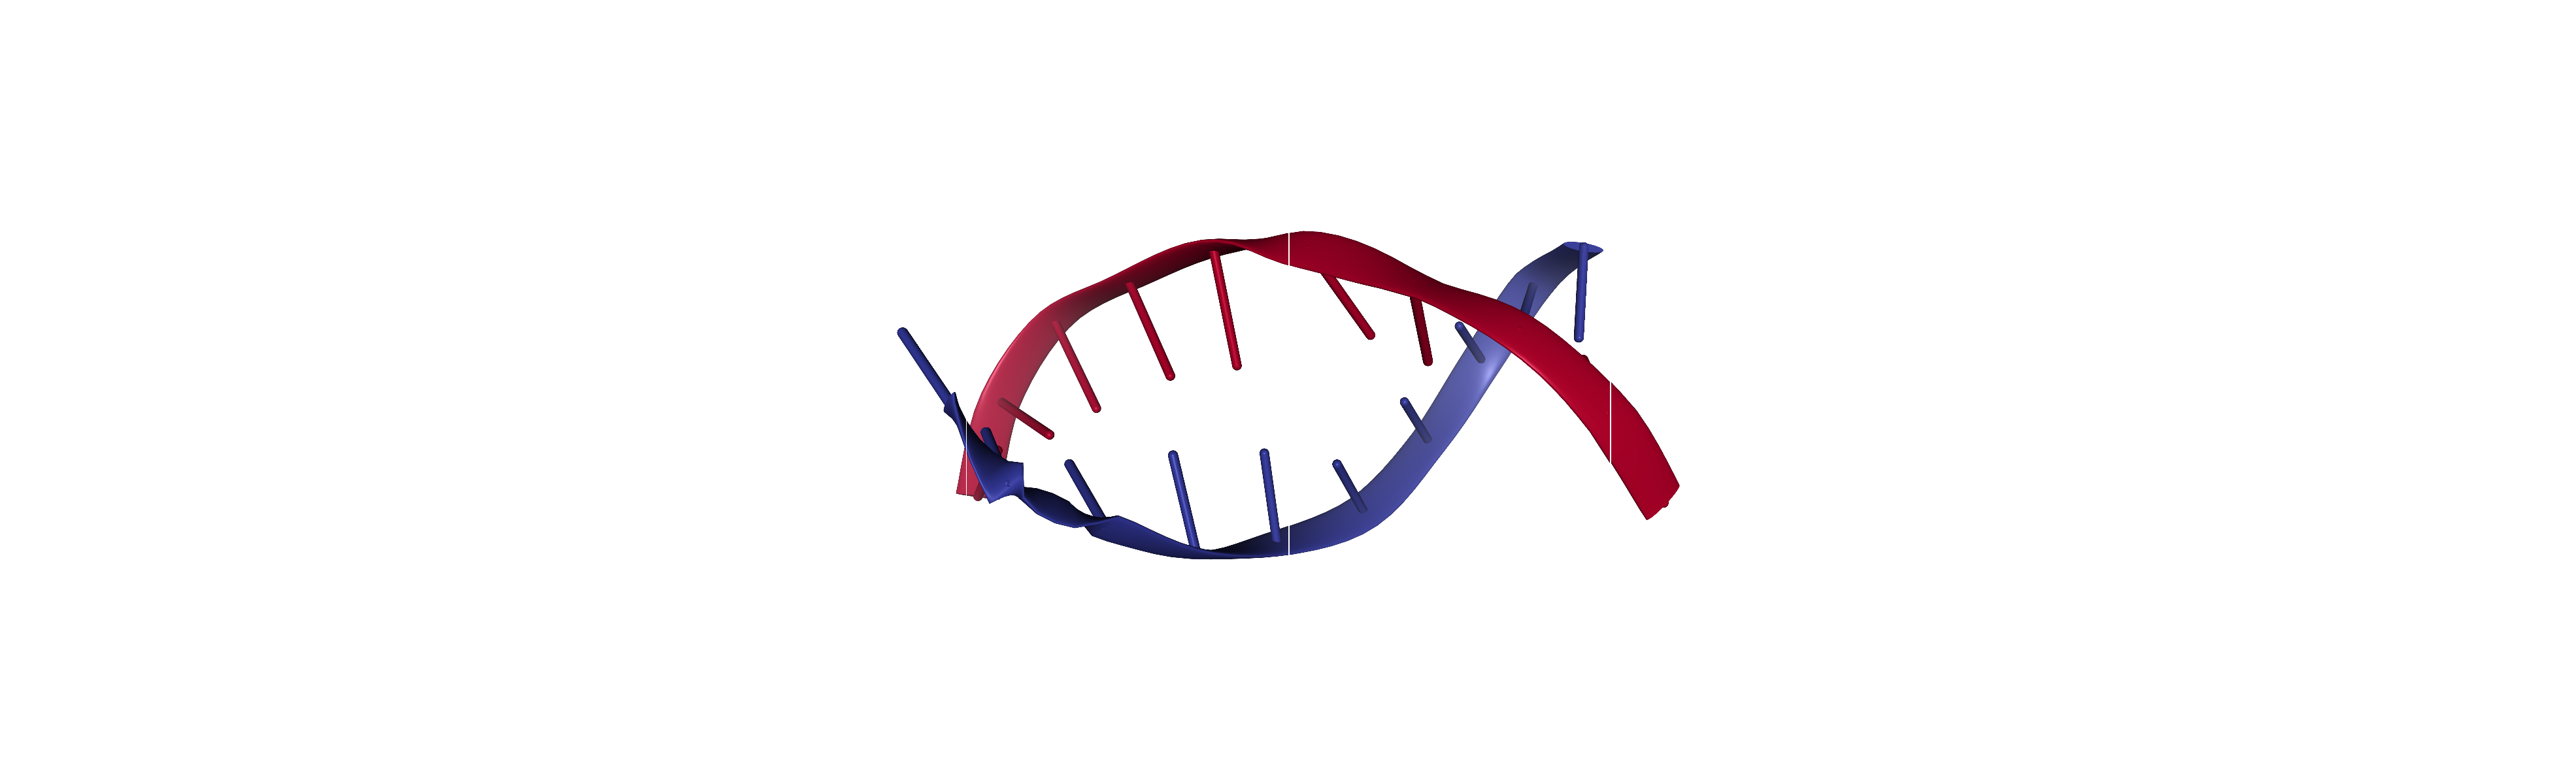

In [341]:
view._display_image()

In [18]:
frame_per_second = 8
im = mpy.ImageSequenceClip(imagefiles, fps=frame_per_second)
im.write_gif('my_movie.gif', fps=frame_per_second)

t:   0%|          | 0/30 [00:00<?, ?it/s, now=None]

MoviePy - Building file my_movie.gif with imageio.


In [19]:
from IPython import display
display.HTML("<img src='my_movie.gif'></img>")